#Getting Images for the case study

Images will be augmented in the output folder using the augmentation.py (Done)

In [16]:
import numpy as np

In [17]:
# Deep Learning CNN model to recognize face
'''This script uses a database of images and creates CNN model on top of it to test
   if the given image is recognized correctly or not'''
 
'''####### IMAGE PRE-PROCESSING for TRAINING and TESTING data #######'''
 
# Specifying the folder where images are present
TrainingImagePath='Training Images/Experiment 2/Faces'
TestingImagePath='Testing Images/Experiment 2/Faces'

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)
 
# Defining pre-processing transformations on raw images of testing data
# No transformations are done on the testing images
from tensorflow import keras 
test_datagen = ImageDataGenerator()
 
# Generating the Training Data
training_set = train_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(64, 64),
        batch_size=5,
        class_mode='categorical')
 
 
# Generating the Testing Data
test_set = test_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(64, 64),
        batch_size=5,
        class_mode='categorical')
 
# Printing class labels for each face
print(training_set.class_indices)
print(test_set.class_indices)

Found 90 images belonging to 3 classes.
Found 90 images belonging to 3 classes.
{'Ahmed': 0, 'Ali': 1, 'Mohamed': 2}
{'Ahmed': 0, 'Ali': 1, 'Mohamed': 2}


#Creating a mapping for index and face names

In [18]:
'''############ Creating lookup table for all faces ############'''
# class_indices have the numeric tag for each face
TrainClasses=training_set.class_indices
 
# Storing the face and the numeric tag for future reference
ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName
 
# Saving the face map for future reference
import pickle
with open("ResultsMap.pkl", 'wb') as fileWriteStream:
    pickle.dump(ResultMap, fileWriteStream)
 
# The model will give answer as a numeric tag
# This mapping will help to get the corresponding face name for it
print("Mapping of Face and its ID",ResultMap)
 
# The number of neurons for the output layer is equal to the number of faces
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: 'Ahmed', 1: 'Ali', 2: 'Mohamed'}

 The Number of output neurons:  3


#Creating the CNN face recognition model

In [19]:
'''######################## Create CNN deep learning model ########################'''
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
import scipy
 
'''Initializing the Convolutional Neural Network'''
classifier= Sequential()
 
''' STEP--1 Convolution
# Adding the first layer of CNN
# we are using the format (64,64,3) because we are using TensorFlow backend
# It means 3 matrix of size (64X64) pixels representing Red, Green and Blue components of pixels
'''
classifier.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(64,64,3), activation='relu'))
 
'''# STEP--2 MAX Pooling'''
classifier.add(MaxPool2D(pool_size=(2,2)))
 
'''############## ADDITIONAL LAYER of CONVOLUTION for better accuracy #################'''
classifier.add(Convolution2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
classifier.add(Convolution2D(128, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
 
classifier.add(MaxPool2D(pool_size=(2,2)))
 
'''# STEP--3 FLattening'''
classifier.add(Flatten())
 
'''# STEP--4 Fully Connected Neural Network'''
classifier.add(Dense(64, activation='relu'))
 
classifier.add(Dense(OutputNeurons, activation='softmax'))
 
'''# Compiling the CNN'''
#classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy","mse"])
 
###########################################################
import time
import scipy
# Measuring the time taken by the model to train
StartTime=time.time()
 
# Starting the model training
hist=classifier.fit(
                    training_set,
                    epochs=15,
                    validation_data=test_set,
                    validation_steps=10)

EndTime=time.time()
print("###### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes ######')

Epoch 1/15
18/18 [==============================] - 2s 56ms/step - loss: 23.6465 - accuracy: 0.3778 - mse: 0.3506 - val_loss: 0.9328 - val_accuracy: 0.6200 - val_mse: 0.1779
Epoch 2/15
18/18 [==============================] - 1s 37ms/step - loss: 0.4202 - accuracy: 0.8222 - mse: 0.0799 - val_loss: 0.0358 - val_accuracy: 1.0000 - val_mse: 0.0032
Epoch 3/15
18/18 [==============================] - 1s 37ms/step - loss: 0.1292 - accuracy: 0.9444 - mse: 0.0283 - val_loss: 0.0051 - val_accuracy: 1.0000 - val_mse: 2.1109e-04
Epoch 4/15
18/18 [==============================] - 1s 36ms/step - loss: 0.1180 - accuracy: 0.9556 - mse: 0.0222 - val_loss: 0.0291 - val_accuracy: 1.0000 - val_mse: 0.0031
Epoch 5/15
18/18 [==============================] - 1s 35ms/step - loss: 0.1386 - accuracy: 0.9556 - mse: 0.0255 - val_loss: 0.1273 - val_accuracy: 0.9400 - val_mse: 0.0271
Epoch 6/15
18/18 [==============================] - 1s 40ms/step - loss: 0.0863 - accuracy: 0.9556 - mse: 0.0181 - val_loss: 0.001

In [ ]:
import numpy as np
from keras.preprocessing import image
 
ImagePath='Testing Images/Experiment 4/Faces/Adel/WIN_20230920_17_34_26_Pro.jpg'
test_image=image.load_img(ImagePath,target_size=(64, 64))
test_image=image.img_to_array(test_image)
 
test_image=np.expand_dims(test_image,axis=0)
 
result=classifier.predict(test_image,verbose=0)

classifier.summary()

In [20]:
classifier.save('face_predictor.h5')

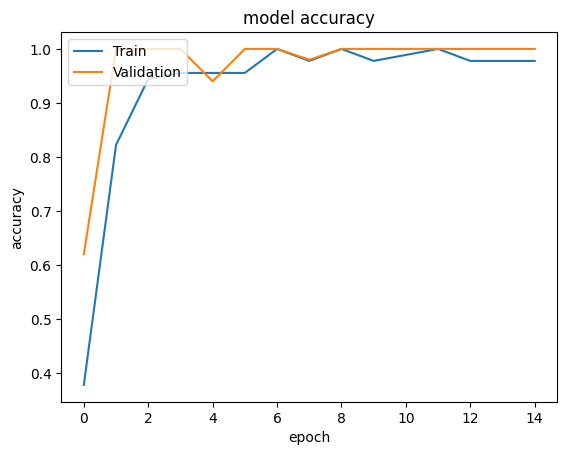

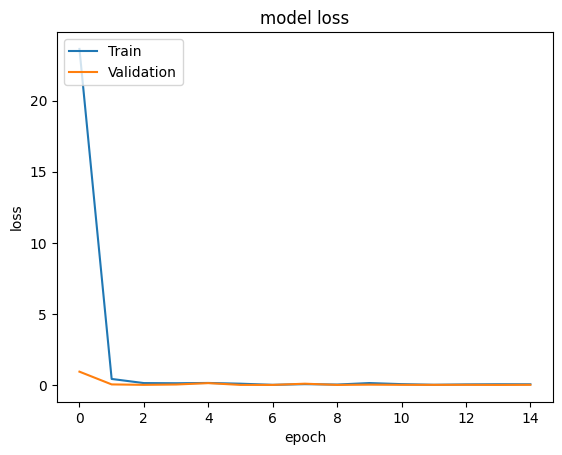

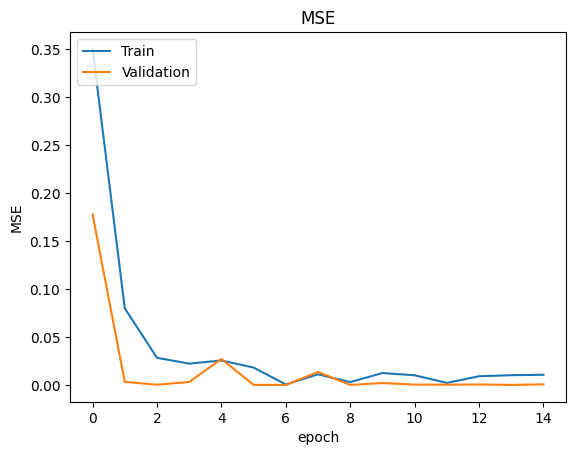

In [21]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
###############################################################################
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.title('MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()